In [143]:
#importing all the things
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [144]:
#import pokemon data into a df
url = '/Users/Danielle/Desktop/Pokemon/Pokemon.csv'
#col_names = ['Pokemon_Number', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']
df = pd.read_csv (url)

In [145]:
df.head()

,Pokemon_Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [146]:
df.tail()

,Pokemon_Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [147]:
df.shape

(800, 13)

In [148]:
df.Type_1.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type_1, dtype: int64

In [31]:
df.Type_2.value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Water       14
Ghost       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type_2, dtype: int64

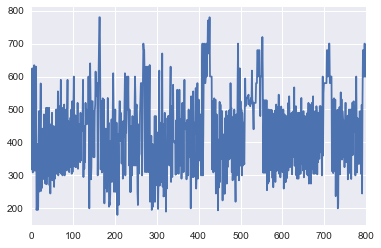

In [151]:
df.Total.plot()

In [34]:
df['Type_1'] = df.Type_1.map({'Water':0, 'Normal':1, 'Grass':2, 'Bug':3, 'Psychic':4, 'Fire':5, 'Electric':6, 'Rock':7, 'Ground':8, 'Ghost':9, 'Dragon':10, 'Dark':11, 'Poison':12, 'Fighting':13, 'Steel':14, 'Ice':15, 'Fairy':16, 'Flying':17})

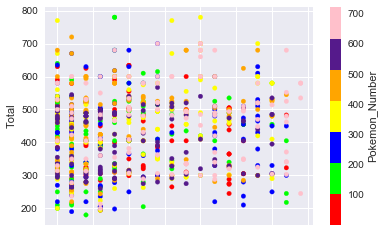

In [44]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#ffff00', '#FFA500', '#551a8b', '#FFC0CB'])

# create a scatter plot of TOTAL versus Type_1 and color by Pokemon_Number
df.plot(kind='scatter', x='Type_1', y='Total', c='Pokemon_Number', colormap=cmap_bold) 

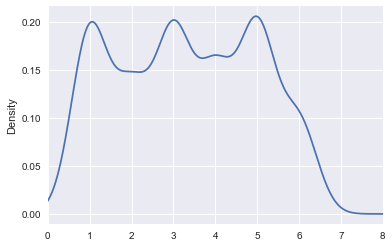

In [47]:
df.Generation.plot(kind='density', xlim=(0, 8))
#view new pokemon over generations

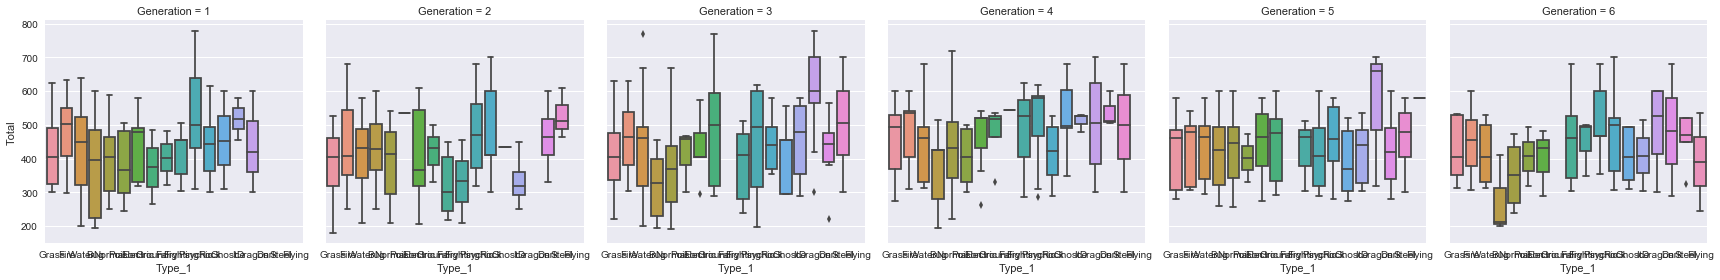

In [179]:
sb.factorplot(
    col='Generation',
    x='Type_1',
    y='Total',
    data=df,
    kind='box' 
)
#look at total metric across generations

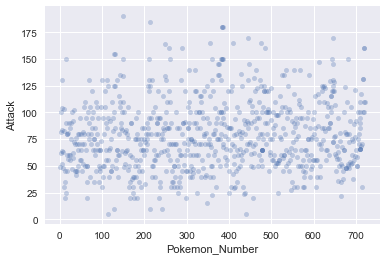

In [50]:
# add transparency
df.plot(kind='scatter', x='Pokemon_Number', y='Attack', alpha=0.3)

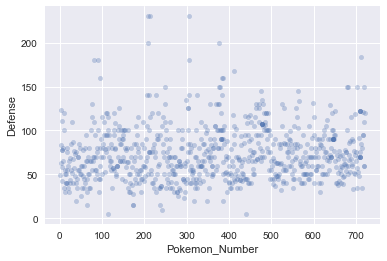

In [51]:
df.plot(kind='scatter', x='Pokemon_Number', y='Defense', alpha=0.3)

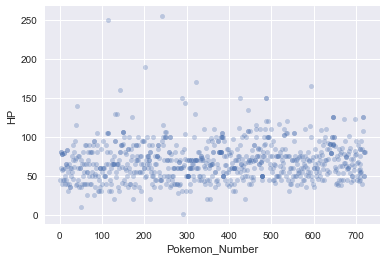

In [52]:
df.plot(kind='scatter', x='Pokemon_Number', y='HP', alpha=0.3)

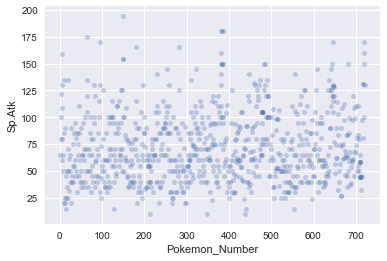

In [54]:
df.plot(kind='scatter', x='Pokemon_Number', y='Sp.Atk', alpha=0.3)

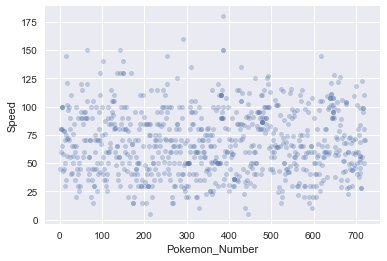

In [141]:
df.plot(kind='scatter', x='Pokemon_Number', y='Speed', alpha=0.3)

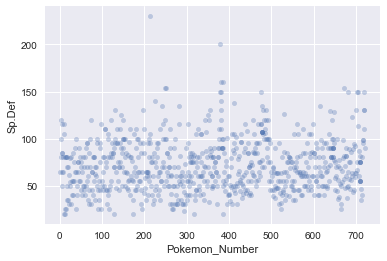

In [142]:
df.plot(kind='scatter', x='Pokemon_Number', y='Sp.Def', alpha=0.3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11897b650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bbcfe90>]], dtype=object)

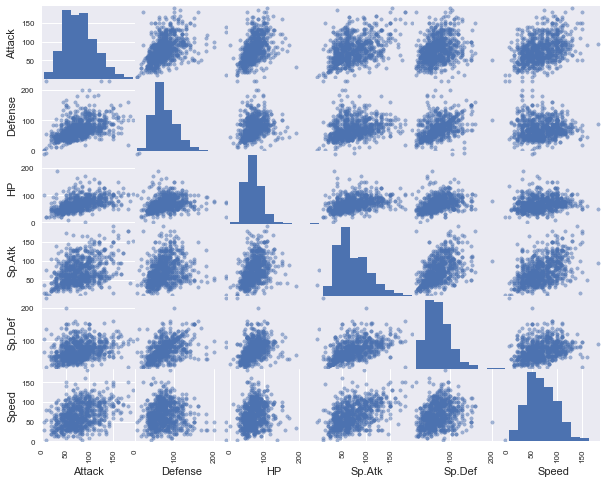

In [57]:
pd.scatter_matrix(df[['Attack', 'Defense', 'HP', 'Sp.Atk', 'Sp.Def', 'Speed']]), figsize=(10, 8))

In [177]:
#import seaborn as sb
#%matplotlib inline
#sb.factorplot(
#   col='Open',
#    x='Type',
#    y='Total',
#    data=df,
#    kind='box' 
#)

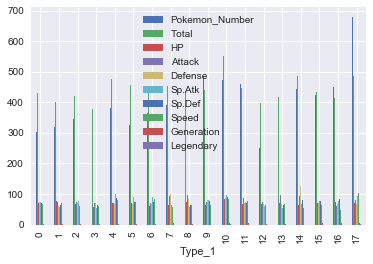

In [58]:
df.groupby('Type_1').mean().plot(kind='bar')

In [59]:
df.Generation.describe()

count    800.00000
mean       3.32375
std        1.66129
min        1.00000
25%        2.00000
50%        3.00000
75%        5.00000
max        6.00000
Name: Generation, dtype: float64

In [60]:
#Starting a KNN to see features versus type to determine strength in type1
# store feature matrix in "X"
feature_cols = ['Attack', 'Defense', 'HP', 'Sp.Atk', 'Sp.Def', 'Speed']
X = df[feature_cols]
print (X)

     Attack  Defense   HP  Sp.Atk  Sp.Def  Speed
0        49       49   45      65      65     45
1        62       63   60      80      80     60
2        82       83   80     100     100     80
3       100      123   80     122     120     80
4        52       43   39      60      50     65
5        64       58   58      80      65     80
6        84       78   78     109      85    100
7       130      111   78     130      85    100
8       104       78   78     159     115    100
9        48       65   44      50      64     43
10       63       80   59      65      80     58
11       83      100   79      85     105     78
12      103      120   79     135     115     78
13       30       35   45      20      20     45
14       20       55   50      25      25     30
15       45       50   60      90      80     70
16       35       30   40      20      20     50
17       25       50   45      25      25     35
18       90       40   65      45      80     75
19      150       40

In [61]:
# store response vector in "y"
y = df.Type_1
print(y)

0       2
1       2
2       2
3       2
4       5
5       5
6       5
7       5
8       5
9       0
10      0
11      0
12      0
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28     12
29     12
       ..
770    16
771    13
772     6
773     7
774    10
775    10
776    10
777    14
778     9
779     9
780     9
781     9
782     9
783     9
784     9
785     9
786     9
787     9
788    15
789    15
790    17
791    17
792    16
793    11
794    10
795     7
796     7
797     4
798     4
799     5
Name: Type_1, dtype: int64


In [62]:
# check X's type
print type(X)
print type(X.values)

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>


In [63]:
# check X's shape (n = number of observations, p = number of features)
print X.shape

(800, 6)


In [64]:
# check y's shape (single dimension with length n)
print y.shape

(800,)


In [65]:
#Step 2: Decide on the estimator you want to to use and import that class
from sklearn.neighbors import KNeighborsClassifier

In [66]:
#Step 3: "Instantiate" the "estimator"
knn = KNeighborsClassifier(n_neighbors=1)
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [67]:
print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [68]:
#Step 4: Fit the model with data (aka "model training")
knn.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [72]:
#Step 5: Use the model to predict the response for a new observation
#this data only goes through Gen VI, using pkmn from VII to have knn predict type_1
#Grass: Fomantis num 753, 
#Attack55,Defense35,HP40,Sp.Atk50,Sp.Def35,Speed35....looking for type #2 grass
#Electric: Xurkitree num 796
#Attack89,Defense71,HP 83,Sp.Atk173,Sp.Def71,Speed83....looking for type #6 electric
#Psychic: Necrozma num 800
#Attack107,Defense101,HP97,Sp.Atk127,Sp.Def89,Speed79....looking for type #4 psychic
new_observation = [[55, 35, 40, 50, 35, 35], [89, 71, 83, 173, 71, 83], [107, 101, 97, 127, 89, 79]]
knn.predict(new_observation)


array([3, 6, 5])

In [ ]:
#3 is bug, not too far from grass.. 
#6 is on point with the prediction of electric!
#5 is fire, this one is a bit more off

In [74]:
#adding a new pokemon- dragon type Jangmo-o num 782 - should be type 10
#adding water, Pyukumuku, num 771 should be type 0
X_new = [[55, 35, 40, 50, 35, 35], [89, 71, 83, 173, 71, 83], [107, 101, 97, 127, 89, 79], [55, 65, 45, 45, 45, 45], [60, 130, 55, 30, 130, 5]]
knn.predict(X_new)


array([3, 6, 5, 0, 9])

In [75]:
#predict probability
knn.predict_proba

<bound method KNeighborsClassifier.predict_proba of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')>

In [76]:
#Step 6: Evaluate the error or accuracy of the model--measure accuracy/cross validation 
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([1, 5, 5, 0, 7])

In [77]:
# calculate predicted probabilities of class membership
knn.predict_proba(X_new)

array([[ 0. ,  0.2,  0. ,  0.2,  0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0. ,
         0.2,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.2,  0. ,  0. ,  0. ,  0.4,  0.2,  0. ,  0. ,  0. ,  0. ,
         0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  0.2,  0. ,  0. ,  0. ,  0. ,
         0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.2,  0. ,  0.2,  0.2,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ,  0. ,
         0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0.6,  0. ,  0.2,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

In [78]:
#not as useful with k=5 as k=1

In [82]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor 
#choose model
treereg = DecisionTreeRegressor(random_state=1)
treereg

# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth = 3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [86]:
# use cross-validation to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))


/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weig

6.9837090723415445

In [87]:
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weig

5.0199406277102891

In [88]:
#try with a loop to find best num of splits from 1 to 7
# list of values to try
max_depth_range = range(1, 8)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use CV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weig

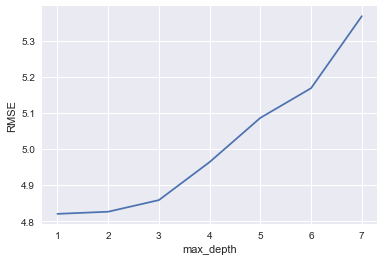

In [89]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE')

In [90]:
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [91]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,Attack,0.265159
1,Defense,0.734841
2,HP,0.000000
3,Sp.Atk,0.000000
4,Sp.Def,0.000000
5,Speed,0.000000


In [92]:
# create a Graphviz file

from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_pkmn.dot', feature_names=feature_cols)

![Tree for Pkmn data](images/tree_pkmn.png)

In [107]:

#![Tree for Titanic data](images/tree_titanic.png)

In [108]:
#try clustering

In [109]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [110]:
# review the cluster labels
km.labels_

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0,
       1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 0, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1,
       1, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0,

In [112]:
# save the cluster labels and sort by cluster
df['cluster'] = km.labels_
df.sort_values('Type_1')

,Pokemon_Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary,cluster
714,647,KeldeoResolute Forme,0,Fighting,580,91,72,90,129,90,108,5,False,1
562,503,Samurott,0,NaN,528,95,100,85,108,70,70,5,False,1
381,349,Feebas,0,NaN,200,20,15,20,10,55,80,3,False,0
382,350,Milotic,0,NaN,540,95,60,79,100,125,81,3,False,1
98,91,Cloyster,0,Ice,525,50,95,180,85,45,70,1,False,2
97,90,Shellder,0,NaN,305,30,65,100,45,25,40,1,False,0
173,159,Croconaw,0,NaN,405,65,80,80,59,63,58,2,False,0
174,160,Feraligatr,0,NaN,530,85,105,100,79,83,78,2,False,2
94,87,Dewgong,0,Ice,475,90,70,80,70,95,70,1,False,2
93,86,Seel,0,NaN,325,65,45,55,45,70,45,1,False,0


In [115]:
# save the DataFrame of cluster centers
centers = df.groupby('cluster').mean()

In [116]:
type(centers)

pandas.core.frame.DataFrame

In [117]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [118]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

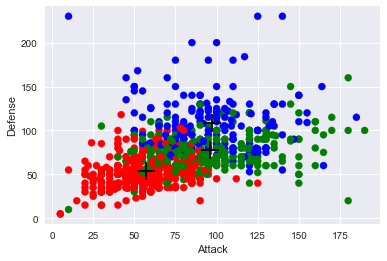

In [119]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df.Attack, df.Defense, c=colors[df.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.Attack, centers.Defense, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('Attack')
plt.ylabel('Defense')

In [121]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [122]:
X_scaled[:25]

array([[-0.92490618, -0.79715364, -0.95062622, -0.2391303 , -0.24818854,
        -0.80150318],
       [-0.5241302 , -0.34791742, -0.3628221 ,  0.21955954,  0.29115635,
        -0.28501525],
       [ 0.09244823,  0.29384863,  0.42091674,  0.83114599,  1.01028289,
         0.40363531],
       [ 0.64736882,  1.57738071,  0.42091674,  1.50389108,  1.72940942,
         0.40363531],
       [-0.83241942, -0.98968346, -1.18574787, -0.39202691, -0.78753344,
        -0.11285261],
       [-0.46247236, -0.50835893, -0.44119598,  0.21955954, -0.24818854,
         0.40363531],
       [ 0.15410607,  0.13340712,  0.34254285,  1.10635989,  0.47093799,
         1.09228588],
       [ 1.57223646,  1.19232109,  0.34254285,  1.74852566,  0.47093799,
         1.09228588],
       [ 0.7706845 ,  0.13340712,  0.34254285,  2.63532601,  1.54962779,
         1.09228588],
       [-0.9557351 , -0.28374081, -0.98981316, -0.69782014, -0.28414487,
        -0.87036824],
       [-0.49330128,  0.19758372, -0.40200904, -0.

In [123]:
# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [124]:
# save the cluster labels and sort by cluster
df['cluster'] = km.labels_
df.sort_values('cluster')

,Pokemon_Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary,cluster
0,1,Bulbasaur,2,Poison,318,45,49,49,65,65,45,1,False,0
285,262,Mightyena,11,NaN,420,70,90,70,60,60,70,3,False,0
284,261,Poochyena,11,NaN,220,35,55,35,30,30,35,3,False,0
583,524,Roggenrola,7,NaN,280,55,75,85,25,25,15,5,False,0
586,527,Woobat,4,Flying,313,55,45,43,55,43,72,5,False,0
280,258,Mudkip,0,NaN,310,50,70,50,50,50,40,3,False,0
588,529,Drilbur,8,NaN,328,60,85,40,30,45,68,5,False,0
277,256,Combusken,5,Fighting,405,60,85,60,85,60,55,3,False,0
276,255,Torchic,5,NaN,310,45,60,40,70,50,45,3,False,0
592,532,Timburr,13,NaN,305,75,80,55,25,35,35,5,False,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c89df90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e735a90>]], dtype=object)

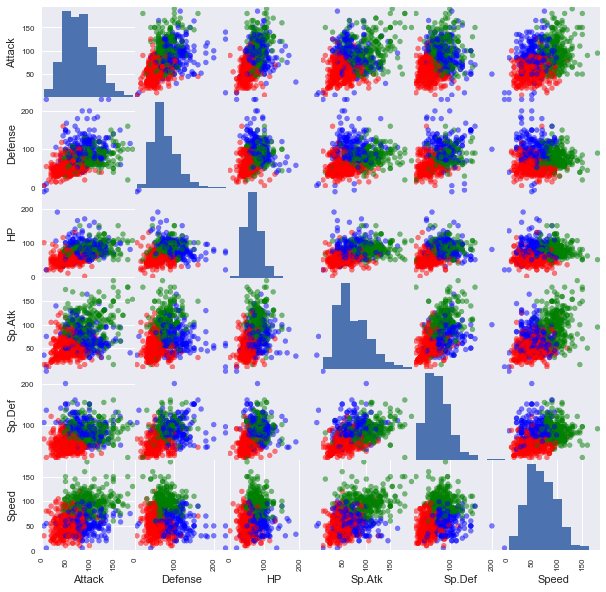

In [126]:
# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[df.cluster], figsize=(10,10), s=100)

In [127]:
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.25693443308418629

In [128]:
# calculate SC for K=2 through K=19
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

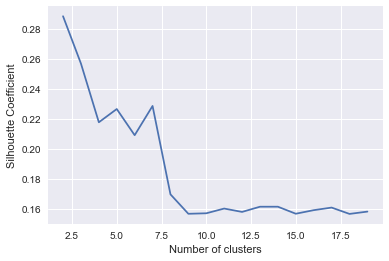

In [129]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [130]:
# K-means with 4 clusters on scaled data
km = KMeans(n_clusters=4, random_state=1)
km.fit(X_scaled)
df['cluster'] = km.labels_
df.sort_values('cluster')

,Pokemon_Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary,cluster
399,364,Sealeo,15,Water,410,90,60,70,75,70,45,3,False,0
470,423,Gastrodon,0,Ground,475,111,83,68,92,82,39,4,False,0
463,416,Vespiquen,3,Flying,474,70,80,102,80,102,40,4,False,0
460,413,WormadamTrash Cloak,3,Steel,424,60,69,95,69,95,36,4,False,0
459,413,WormadamSandy Cloak,3,Ground,424,60,79,105,59,85,36,4,False,0
458,413,WormadamPlant Cloak,3,Grass,424,60,59,85,79,105,36,4,False,0
456,411,Bastiodon,7,Steel,495,60,52,168,47,138,30,4,False,0
440,395,Empoleon,0,Steel,530,84,86,88,111,101,60,4,False,0
434,389,Torterra,2,Ground,525,95,109,105,75,85,56,4,False,0
433,388,Grotle,2,NaN,405,75,89,85,55,65,36,4,False,0


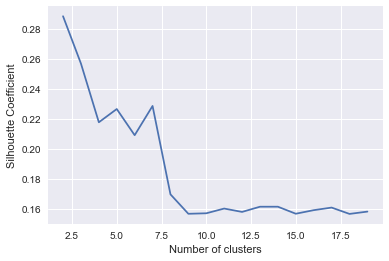

In [131]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [132]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    min_samples=3, n_jobs=1, p=None)

In [133]:
# review the cluster labels
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,
       -1, -1,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0, -1, -1, -1, -1,  1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1, -1, -1,  0

In [134]:
# save the cluster labels and sort by cluster
df['cluster'] = db.labels_
df.sort_values('cluster')

,Pokemon_Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary,cluster
508,458,Mantyke,0,Flying,345,45,20,50,60,120,50,4,False,-1
123,115,Kangaskhan,1,NaN,490,105,95,80,40,80,90,1,False,-1
217,202,Wobbuffet,4,NaN,405,190,33,58,33,58,33,2,False,-1
125,116,Horsea,0,NaN,295,30,40,70,70,25,60,1,False,-1
126,117,Seadra,0,NaN,440,55,65,95,95,45,85,1,False,-1
691,630,Mandibuzz,11,Flying,510,110,65,105,55,95,80,5,False,-1
356,325,Spoink,4,NaN,330,60,25,35,70,80,60,3,False,-1
621,560,Scrafty,11,Fighting,488,65,90,115,45,115,58,5,False,-1
354,323,CameruptMega Camerupt,5,Ground,560,70,120,100,145,105,20,3,False,-1
131,122,Mr. Mime,4,Fairy,460,40,45,65,100,120,90,1,False,-1


In [135]:
# review the cluster centers
df.groupby('cluster').mean()

,Pokemon_Number,Type_1,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
cluster,,,,,,,,,,,
-1,333.243902,5.689024,501.524390,78.987805,89.652439,89.250000,83.500000,88.554878,71.579268,2.957317,0.182927
0,364.485294,5.475490,410.501634,65.905229,74.949346,68.336601,68.661765,66.120915,66.527778,3.383987,0.037582
1,418.200000,4.800000,590.000000,103.800000,125.400000,92.000000,75.800000,85.400000,107.600000,3.400000,0.400000
2,529.500000,9.500000,687.500000,108.250000,160.000000,118.750000,115.000000,93.750000,91.750000,4.250000,0.750000
3,479.000000,6.000000,520.000000,50.000000,65.000000,107.000000,105.000000,107.000000,86.000000,4.000000,0.000000
4,497.750000,8.500000,685.000000,92.500000,122.500000,105.000000,152.500000,115.000000,97.500000,4.000000,1.000000
5,693.000000,12.333333,673.333333,125.666667,130.666667,93.333333,130.666667,95.333333,97.666667,5.666667,1.000000
6,620.000000,9.333333,515.000000,56.666667,51.666667,148.333333,58.333333,150.000000,50.000000,5.333333,0.000000


In [136]:
# scatter plot matrix of DBSCAN cluster assignments (
pd.scatter_matrix(X, c=colors[df.cluster], figsize=(10,10), s=100)

IndexError: index 4 is out of bounds for axis 1 with size 4

In [137]:
## calculate SC this model
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)
metrics.silhouette_score(X_scaled, db.labels_)

-0.04079024808954259

In [139]:
db = DBSCAN(eps=1, min_samples=5)
db.fit(X_scaled)
metrics.silhouette_score(X_scaled, db.labels_)

0.026507286550217227

In [140]:
db = DBSCAN(eps=2, min_samples=4)
db.fit(X_scaled)
metrics.silhouette_score(X_scaled, db.labels_)

0.49701346536497754

In [153]:
#try random forest
#notes in class 16,  Building and tuning decision trees and Random Forests section
#Each observation represents a pokemon 
#Goal: Predict pokemon type based on most important features

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

In [154]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weig

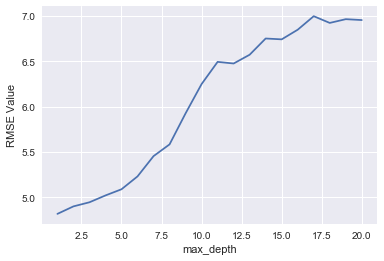

In [155]:

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE Value')

In [156]:
# show the best RMSE and the corresponding max_depth
sorted(zip(RMSE_scores, max_depth_range))[0]

(4.8165578032902303, 1)

In [157]:
# 1 is best fit
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [158]:
# compute feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
1,Defense,1.0
0,Attack,0.0
2,HP,0.0
3,Sp.Atk,0.0
4,Sp.Def,0.0
5,Speed,0.0


In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#rfreg = RandomForestRegressor(n_estimators=i, max_features=i, random_state=1)
rfreg = RandomForestRegressor()
rfreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [163]:
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)
#need to figure out n_estimators
# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weig

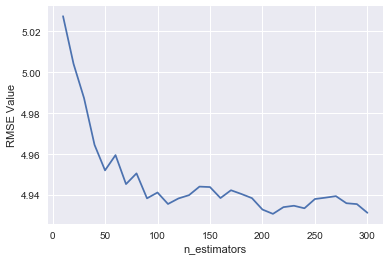

In [165]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE Value')
#ask about n_estimators

In [166]:
# list of values to try for max_features
feature_range = range(1, len(feature_cols)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=60, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Danielle/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weig

In [167]:
# show the best RMSE and the corresponding max_features
sorted(zip(RMSE_scores, feature_range))[0]

(4.8444926613177106, 1)

In [171]:
# max_features=10 is best and n_estimator-- trying 80
rfreg = RandomForestRegressor(n_estimators=80, max_features=1, oob_score=True, random_state=1)
rfreg.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
           oob_score=True, random_state=1, verbose=0, warm_start=False)

In [172]:
# compute feature importances
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
1,Defense,0.174624
0,Attack,0.172085
5,Speed,0.170344
3,Sp.Atk,0.163124
4,Sp.Def,0.160952
2,HP,0.158871


In [174]:
rfreg.oob_score_

0.0012038453370498692